In [19]:
import networkx as nx
import random
import matplotlib.pyplot as plt

class AntColony:
    def __init__(self, num_ants, alpha, beta, rho, Q, num_iterations):
        self.num_ants = num_ants
        self.alpha = alpha # pheromone factor
        self.beta = beta # visibility factor
        self.rho = rho # pheromone evaporation rate
        self.Q = Q # pheromone deposit factor
        self.num_iterations = num_iterations

    def solve(self, graph):
        self.graph = graph
        num_nodes = len(graph.nodes)
        self.pheromone = [[1 / (num_nodes * num_nodes) for j in range(num_nodes)] for i in range(num_nodes)]

        best_path = None
        best_path_length = float('inf')

        for iteration in range(self.num_iterations):
            ant_paths = self._generate_ant_paths()
            self._update_pheromone(ant_paths)

            shortest_path = min(ant_paths, key=lambda x: self._path_length(x))
            shortest_path_length = self._path_length(shortest_path)

            if shortest_path_length < best_path_length:
                best_path = shortest_path
                best_path_length = shortest_path_length

            self._evaporate_pheromone()

        return best_path, best_path_length

    def _generate_ant_paths(self):
        ant_paths = []
        for ant in range(self.num_ants):
            start_node = random.randint(0, len(self.graph.nodes) - 1)
            visited = [False] * len(self.graph.nodes)
            visited[start_node] = True
            path = [start_node]

            for _ in range(len(self.graph.nodes) - 1):
                next_node = self._select_next_node(path, visited)
                visited[next_node] = True
                path.append(next_node)

            path.append(start_node) # Return to starting node
            ant_paths.append(path)

        return ant_paths

    def _select_next_node(self, path, visited):
        current_node = path[-1]
        unvisited_nodes = [i for i in range(len(self.graph.nodes)) if not visited[i]]

        probabilities = [((self.pheromone[current_node][i]) ** self.alpha) * ((1 / self.graph[current_node][i]['weight']) ** self.beta) for i in unvisited_nodes]
        total_prob = sum(probabilities)
        probabilities = [p / total_prob for p in probabilities]

        selected_node = random.choices(unvisited_nodes, probabilities)[0]
        return selected_node

    def _update_pheromone(self, ant_paths):
        for i in range(len(self.graph.nodes)):
            for j in range(len(self.graph.nodes)):
                self.pheromone[i][j] *= (1 - self.rho) # Evaporation
                for path in ant_paths:
                    if j in path and i in path[path.index(j):]:
                        self.pheromone[i][j] += self.Q / self._path_length(path)

    def _evaporate_pheromone(self):
        for i in range(len(self.graph.nodes)):
            for j in range(len(self.graph.nodes)):
                self.pheromone[i][j] *= (1 - self.rho)

    def _path_length(self, path):
        length = 0
        for i in range(len(path) - 1):
            length += self.graph[path[i]][path[i+1]]['weight']
        return length

# Create a graph representing the cities and distances between them
def create_graph(num_cities, max_distance):
    graph = nx.complete_graph(num_cities)
    for (u, v) in graph.edges():
        graph[u][v]['weight'] = random.randint(1, max_distance)
    return graph


# Visualize the optimized path
def visualize_optimized_path(graph, path):
    pos = nx.spring_layout(graph)
    labels = nx.get_edge_attributes(graph, 'weight')

    selected_edges = [(path[i], path[i+1]) for i in range(len(path) - 1)]
    selected_edges += [(path[i+1], path[i]) for i in range(len(path) - 1)]  # Include reverse edges

    selected_labels = {(path[i], path[i+1]): labels.get((path[i], path[i+1]), labels.get((path[i+1], path[i]), '')) for i in range(len(path) - 1)}

    nx.draw(graph, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_weight='bold')
    nx.draw_networkx_edges(graph, pos, edgelist=selected_edges, edge_color='red', width=2.0)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=selected_labels)
    plt.title("Optimized Path")
    plt.show()

def print_cities_and_distances(graph):
    print("Cities and their respective distances:")
    for u, v, data in graph.edges(data=True):
        distance = data['weight']
        print(f"City {u} -> City {v}: Distance = {distance}")

def print_route_with_distances(best_path, graph):
    total_distance = 0
    print("Route followed by the salesman with distances:")
    for i in range(len(best_path) - 1):
        from_city = best_path[i]
        to_city = best_path[i + 1]
        distance = graph[from_city][to_city]['weight']
        total_distance += distance
        print(f"From City {from_city} to City {to_city}: Distance = {distance}")

    # Add distance from last city back to the starting city
    from_city = best_path[-1]
    to_city = best_path[0]
    distance = graph[from_city][to_city]['weight']
    total_distance += distance
    print(f"From City {from_city} back to City {to_city}: Distance = {distance}")

    print(f"Total Distance: {total_distance}")




Cities and their respective distances:
City 0 -> City 1: Distance = 60
City 0 -> City 2: Distance = 67
City 0 -> City 3: Distance = 87
City 0 -> City 4: Distance = 32
City 1 -> City 2: Distance = 49
City 1 -> City 3: Distance = 83
City 1 -> City 4: Distance = 64
City 2 -> City 3: Distance = 5
City 2 -> City 4: Distance = 17
City 3 -> City 4: Distance = 26
Best Path: [2, 3, 4, 0, 1, 2]
Best Path Length: 172


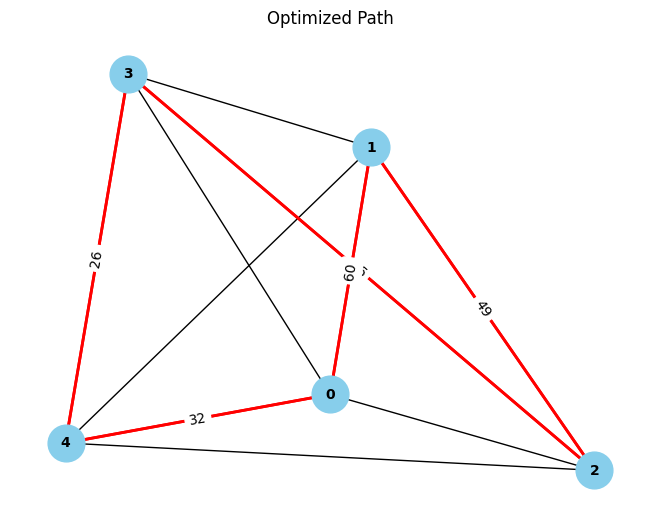

In [20]:
# Main function to run ACO for TSP
def main(num_cities, max_distance, num_ants, alpha, beta, rho, Q, num_iterations):
    graph = create_graph(num_cities, max_distance)
    print_cities_and_distances(graph)
    # visualize_graph(graph)

    ant_colony = AntColony(num_ants, alpha, beta, rho, Q, num_iterations)
    best_path, best_path_length = ant_colony.solve(graph)

    print("Best Path:", best_path)
    print("Best Path Length:", best_path_length)

    # print_route_with_distances(best_path, graph)
    visualize_optimized_path(graph, best_path)

# Example Usage
if __name__ == "__main__":
    num_cities = 5
    max_distance = 100
    num_ants = 30
    alpha = 1
    beta = 2
    rho = 0.1
    Q = 10
    num_iterations = 100

    main(num_cities, max_distance, num_ants, alpha, beta, rho, Q, num_iterations)